Dataset Shape: (7043, 21)
Column Names: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


<ipython-input-4-500f60a7d99b>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


                      coef  exp(coef)  se(coef)  coef lower 95%  \
covariate                                                         
gender           -0.014342   0.985760  0.011962       -0.037787   
SeniorCitizen    -0.039152   0.961604  0.012739       -0.064120   
Partner          -0.135580   0.873209  0.014201       -0.163414   
Dependents        0.014813   1.014923  0.014020       -0.012666   
PhoneService      0.062411   1.064400  0.015403        0.032221   
MultipleLines    -0.125743   0.881841  0.013135       -0.151487   
InternetService  -0.206701   0.813263  0.017278       -0.240565   
OnlineSecurity   -0.005320   0.994695  0.013480       -0.031740   
OnlineBackup     -0.019814   0.980381  0.012724       -0.044753   
DeviceProtection  0.010105   1.010156  0.012970       -0.015316   
TechSupport       0.040259   1.041080  0.013289        0.014213   
StreamingTV      -0.023636   0.976642  0.013864       -0.050809   
StreamingMovies  -0.023040   0.977223  0.013874       -0.05023

<Axes: xlabel='log(HR) (95% CI)'>

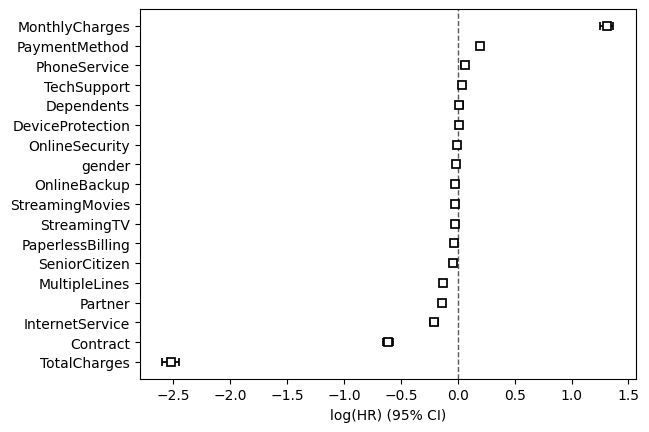

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)

# Convert 'TotalCharges' to numeric (handling errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col not in ['customerID', 'Churn']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Convert 'Churn' to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define survival time and event
T = df['tenure']  # Tenure as the duration variable
E = df['Churn']   # Churn as the event variable

# Drop unnecessary columns
df.drop(columns=['customerID'], inplace=True)

# Standardize numerical features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaled_features = scaler.fit_transform(df[numeric_cols])
df[numeric_cols] = scaled_features

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df, duration_col='tenure', event_col='Churn')

# Print summary of the model
print(cph.summary)

# Predict churn survival probabilities
churn_risk = cph.predict_partial_hazard(df)
df['Churn_Risk'] = churn_risk

# Calculate churn rate
churn_rate = df['Churn'].sum() / len(df)
print(f"Overall Churn Rate: {churn_rate:.2%}")

# Plot survival curve
cph.plot()


In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=bcfed7411141cacd693ad37c703692b3478170b810e28116eca93fd70b4f5586
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2025-02-04 15:25:09 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
SeniorCitizen                          0.03      1.04      0.06           -0.08            0.15                0.93                1.16
MonthlyCharges                         0.01      1.01      0.02           -0.03            0.06                0.97                1.06
TotalCharges                          -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
gender_Male                           -0.04      0.96      0.05           -0.13            0.05                0.88                1.05
Partner_Yes                           -0.18      0.84      0.06           -0.29           -0.07                0.75                0.93
Dependents_Yes                        -0.09      0.91      0.07           -0.23            0.05                0.80                1.05
PhoneService_Yes                       0.83      2.29      0.47           -0.10            1.76                0.90                5.80
MultipleLines_Yes                      0.09      1.09      0.13           -0.16            0.33                0.85                1.40
InternetService_Fiber optic            1.02      2.77      0.58           -0.12            2.15                0.89                8.59
InternetService_No                    -2.34      0.10      0.60           -3.51           -1.17                0.03                0.31
OnlineSecurity_Yes                    -0.21      0.81      0.13           -0.47            0.05                0.62                1.05
OnlineBackup_Yes                      -0.06      0.95      0.13           -0.31            0.19                0.74                1.21
DeviceProtection_Yes                   0.09      1.09      0.13           -0.16            0.34                0.85                1.40
TechSupport_Yes                       -0.08      0.92      0.13           -0.34            0.17                0.71                1.19
StreamingTV_Yes                        0.28      1.32      0.24           -0.18            0.74                0.83                2.10
StreamingMovies_Yes                    0.29      1.33      0.24           -0.18            0.75                0.84                2.11
Contract_One year                     -1.27      0.28      0.10           -1.46           -1.07                0.23                0.34
Contract_Two year                     -3.70      0.02      0.20           -4.10           -3.31                0.02                0.04
PaperlessBilling_Yes                   0.15      1.16      0.06            0.04            0.26                1.04                1.30
PaymentMethod_Credit card (automatic) -0.01      0.99      0.09           -0.19            0.17                0.83                1.18
PaymentMethod_Electronic check         0.39      1.47      0.07            0.24            0.53                1.28                1.70
PaymentMethod_Mailed check             0.51      1.67      0.09            0.34            0.68                1.40                1.98

                                       cmp to      z      p  -log2(p)
covariate                                                            
SeniorCitizen                            0.00   0.61   0.54      0.88
MonthlyCharges                           0.00   0.57   0.57      0.82
TotalCharges                             0.00 -39.16 <0.005       inf
gender_Male         

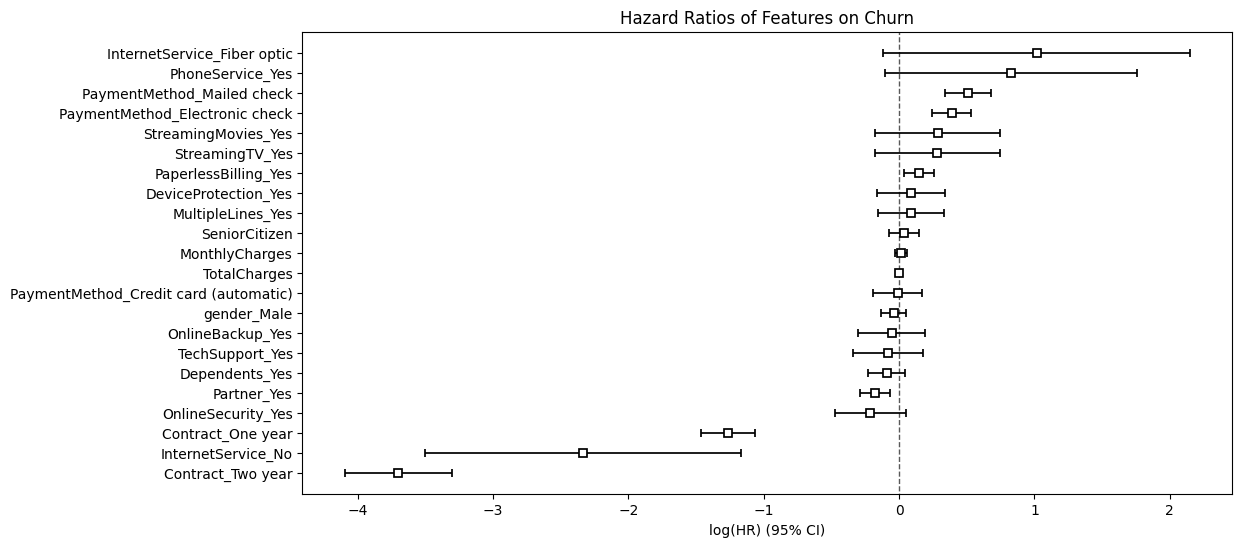

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Convert 'TotalCharges' to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

# Convert 'Churn' to binary (1 = Churn, 0 = No Churn)
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

# Drop customer ID (not useful for modeling)
df = df.drop(columns=["customerID"])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# 🔹 Step 1: Remove Highly Correlated Features
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_encoded = df_encoded.drop(columns=to_drop)

# 🔹 Step 2: Remove Near-Zero Variance Columns
n_unique = df_encoded.nunique()
low_variance_cols = n_unique[n_unique == 1].index.tolist()
df_encoded = df_encoded.drop(columns=low_variance_cols)

# Define and fit Cox model
cph = CoxPHFitter()
cph.fit(df_encoded, duration_col="tenure", event_col="Churn")

# Display model summary
cph.print_summary()

# Plot hazard ratios for all variables
plt.figure(figsize=(12, 6))
cph.plot()
plt.title("Hazard Ratios of Features on Churn")
plt.show()